In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel(r'C:/Users/Dell/Desktop/Assignments/Clustering/EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Dropping the columns that have no significance
data1 = data.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1)
data1.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [5]:
#Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)

In [6]:
scaled_data1

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

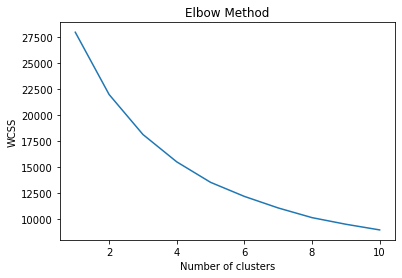

In [7]:
#SCree plot to check the ideal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Building the cluster algorithm
cluster_new = KMeans(n_clusters=7, random_state=42)
cluster_new.fit(scaled_data1)

KMeans(n_clusters=7, random_state=42)

In [14]:
cluster_new.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
cluster_new.cluster_centers_

array([[-0.36377725, -0.13924787, -0.46393182, -0.45282147, -0.24527824,
        -0.25628409, -0.91572103],
       [-0.19591337, -0.11593076, -0.44698841, -0.42468155, -0.22739054,
        -0.23927151,  0.83276307],
       [ 0.31309123, -0.11658105,  1.09914354,  0.8816023 , -0.16675562,
        -0.17551875,  0.33076079],
       [ 0.33380496,  0.08992243,  0.18557502,  0.86114203,  1.83516945,
         1.86081715,  0.06842947],
       [ 0.40104822,  6.97963892,  0.08496946,  0.07251624,  0.34264606,
         0.38256881, -0.11932141],
       [ 4.59266552,  0.08608535,  2.24561555,  1.12602035,  0.56295169,
         0.76001413,  1.06917247],
       [ 0.69777639,  0.49061936,  0.87270758,  2.51326982,  5.85008726,
         6.11999994,  0.1175122 ]])

In [16]:
cl = pd.DataFrame(cluster_new.labels_,columns=(['Clusters']))

In [18]:
cl.head()

,Clusters
0,1
1,1
2,1
3,1
4,2


In [19]:
f_data = pd.concat([data1,cl],axis=1)
f_data.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,174,1,0,0,7000,1
1,19244,0,215,2,0,0,6968,1
2,41354,0,4123,4,0,0,7034,1
3,14776,0,500,1,0,0,6952,1
4,97752,0,43300,26,2077,4,6935,2


In [20]:
f_data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean
0,0,36946.017173,36.396962,5941.844782,7.253633,116.657860,0.401585,2227.708719
1,1,53860.496234,54.434310,6350.993305,7.523849,141.701255,0.466109,5838.112134
2,2,105149.359679,53.931271,43686.907216,20.067583,226.592211,0.707904,4801.539519
3,3,107236.537778,213.675556,21626.102222,19.871111,3029.355556,8.431111,4259.857778
4,4,114012.175439,5543.333333,19196.684211,12.298246,939.771930,2.824561,3872.175439
5,5,536372.378049,210.707317,71371.853659,22.414634,1248.207317,4.256098,6326.268293
6,6,143911.415094,523.641509,38218.943396,35.735849,8650.377358,24.584906,4361.207547


In [22]:
f_data.groupby('Clusters').agg(['count']).reset_index()

,Clusters,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,count,count,count,count,count,count,count
0,0,1514,1514,1514,1514,1514,1514,1514
1,1,1195,1195,1195,1195,1195,1195,1195
2,2,873,873,873,873,873,873,873
3,3,225,225,225,225,225,225,225
4,4,57,57,57,57,57,57,57
5,5,82,82,82,82,82,82,82
6,6,53,53,53,53,53,53,53


# Inferences
* The scree plot doesn't show a 'elbow' point, hence the closest number to the decline was chosen, i.e, 7